# Random Forest for Diabetes Prediction

## Project Overview
This notebook builds upon our previous decision tree project to implement Random Forest models for diabetes prediction. Random Forest is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

## What We'll Do
1. **Load the preprocessed dataset** from the previous project
2. **Build Random Forest models** with different hyperparameters
3. **Analyze and compare results** to optimize performance
4. **Save the best model**

## Why Random Forest?
Random Forest improves upon individual decision trees by:
- **Reducing overfitting** through ensemble averaging
- **Improving accuracy** by combining multiple weak learners
- **Handling feature importance** more robustly
- **Providing better generalization** on unseen data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import joblib
import os
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Loading the Dataset

Load the preprocessed dataset from the previous decision tree project. The data has already been cleaned, engineered, and split into training and testing sets.

In [2]:
# Load the preprocessed diabetes dataset
data_path = '/workspaces/tgedin_machine_learning_python_template/data/processed/Diabetes_dataset'

# Load training and testing features
X_train_diabetes = pd.read_csv(f'{data_path}/X_train.csv')
X_test_diabetes = pd.read_csv(f'{data_path}/X_test.csv')

# Load training and testing targets
y_train_diabetes = pd.read_csv(f'{data_path}/y_train.csv').values.ravel()
y_test_diabetes = pd.read_csv(f'{data_path}/y_test.csv').values.ravel()

# Display dataset information
print("Dataset Information:")
print(f"Training samples: {X_train_diabetes.shape[0]}")
print(f"Test samples: {X_test_diabetes.shape[0]}")
print(f"Features: {X_train_diabetes.shape[1]}")
print(f"Feature names: {list(X_train_diabetes.columns)}")
print(f"Target distribution (train): {np.bincount(y_train_diabetes)}")
print(f"Class balance (train): {np.bincount(y_train_diabetes) / len(y_train_diabetes)}")

Dataset Information:
Training samples: 614
Test samples: 154
Features: 8
Feature names: ['Glucose', 'Insulin', 'BMI', 'SkinThickness', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
Target distribution (train): [400 214]
Class balance (train): [0.6514658 0.3485342]


## Step 2: Build Random Forest Models

We'll build Random Forest models with different hyperparameters and compare them with our previous Decision Tree model. Key hyperparameters to optimize:
- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum depth of individual trees
- **min_samples_split**: Minimum samples required to split a node

In [3]:
# Load the previously trained Decision Tree model for comparison
dt_model_path = '/workspaces/tgedin_machine_learning_python_template/models/Decision_tree/optimized_decision_tree.pkl'
decision_tree_model = joblib.load(dt_model_path)

# Evaluate Decision Tree baseline
dt_predictions = decision_tree_model.predict(X_test_diabetes)
dt_accuracy = accuracy_score(y_test_diabetes, dt_predictions)

print("Decision Tree Baseline Performance:")
print(f"Accuracy: {dt_accuracy:.3f}")
print(f"Classification Report:")
print(classification_report(y_test_diabetes, dt_predictions, target_names=['No Diabetes', 'Diabetes']))

Decision Tree Baseline Performance:
Accuracy: 0.714
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.74      0.87      0.80       100
    Diabetes       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



**Decision Tree Baseline Summary:**

Our optimized Decision Tree model establishes the performance benchmark that Random Forest needs to beat. Note the precision and recall values for each class - Random Forest should improve on these metrics through ensemble averaging.

### 2.1 Load Decision Tree Baseline

**What the following code does:**
- Loads our previously saved optimized Decision Tree model from the pickle file
- Makes predictions on the test set to establish a baseline performance
- Displays accuracy and detailed classification metrics for comparison

In [4]:
# Build Random Forest models with different hyperparameters
rf_configs = {
    'rf_small': {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 5},
    'rf_medium': {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 3},
    'rf_large': {'n_estimators': 200, 'max_depth': 12, 'min_samples_split': 2},
    'rf_deep': {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 4}
}

rf_models = {}
rf_results = {}

print("Random Forest Model Performance:")
print("-" * 50)

for name, params in rf_configs.items():
    # Train model
    rf_model = RandomForestClassifier(random_state=42, **params)
    rf_model.fit(X_train_diabetes, y_train_diabetes)
    
    # Predictions
    train_pred = rf_model.predict(X_train_diabetes)
    test_pred = rf_model.predict(X_test_diabetes)
    
    # Metrics
    train_acc = accuracy_score(y_train_diabetes, train_pred)
    test_acc = accuracy_score(y_test_diabetes, test_pred)
    
    # Store results
    rf_models[name] = rf_model
    rf_results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'predictions': test_pred,
        'params': params
    }
    
    print(f"{name}: Train={train_acc:.3f}, Test={test_acc:.3f}")

# Select best Random Forest model
best_rf_name = max(rf_results, key=lambda x: rf_results[x]['test_acc'])
best_rf_model = rf_models[best_rf_name]
best_rf_test_acc = rf_results[best_rf_name]['test_acc']

print(f"\nBest Random Forest: {best_rf_name} with test accuracy: {best_rf_test_acc:.3f}")
print(f"Improvement over Decision Tree: {best_rf_test_acc - dt_accuracy:.3f}")

Random Forest Model Performance:
--------------------------------------------------
rf_small: Train=0.938, Test=0.740


rf_medium: Train=0.997, Test=0.721
rf_large: Train=1.000, Test=0.727
rf_large: Train=1.000, Test=0.727
rf_deep: Train=0.997, Test=0.740

Best Random Forest: rf_small with test accuracy: 0.740
Improvement over Decision Tree: 0.026
rf_deep: Train=0.997, Test=0.740

Best Random Forest: rf_small with test accuracy: 0.740
Improvement over Decision Tree: 0.026


**GridSearch Optimization Summary:**

GridSearchCV systematically tested 72 parameter combinations to find the optimal Random Forest configuration. This streamlined approach balances comprehensive exploration with reasonable runtime (~2 minutes). The best parameters found through cross-validation should provide better generalization than manual parameter selection.

### 2.2 GridSearch Hyperparameter Optimization

**What the following code does:**
- Defines a focused parameter grid with 5 hyperparameters to optimize (72 combinations)
- Uses GridSearchCV with 3-fold cross-validation to test all combinations quickly
- Tests 72 different parameter combinations systematically (reduced for speed)
- Selects the best model based on cross-validation accuracy
- Compares the optimized model performance against the Decision Tree baseline
- Uses verbose=2 for detailed progress tracking

### 2.3 Model Comparison and Analysis

**What the following code does:**
- Creates side-by-side confusion matrices for visual comparison
- Generates detailed classification reports with precision, recall, and F1-scores
- Extracts and displays feature importance from the best Random Forest
- Provides comprehensive performance metrics for both models

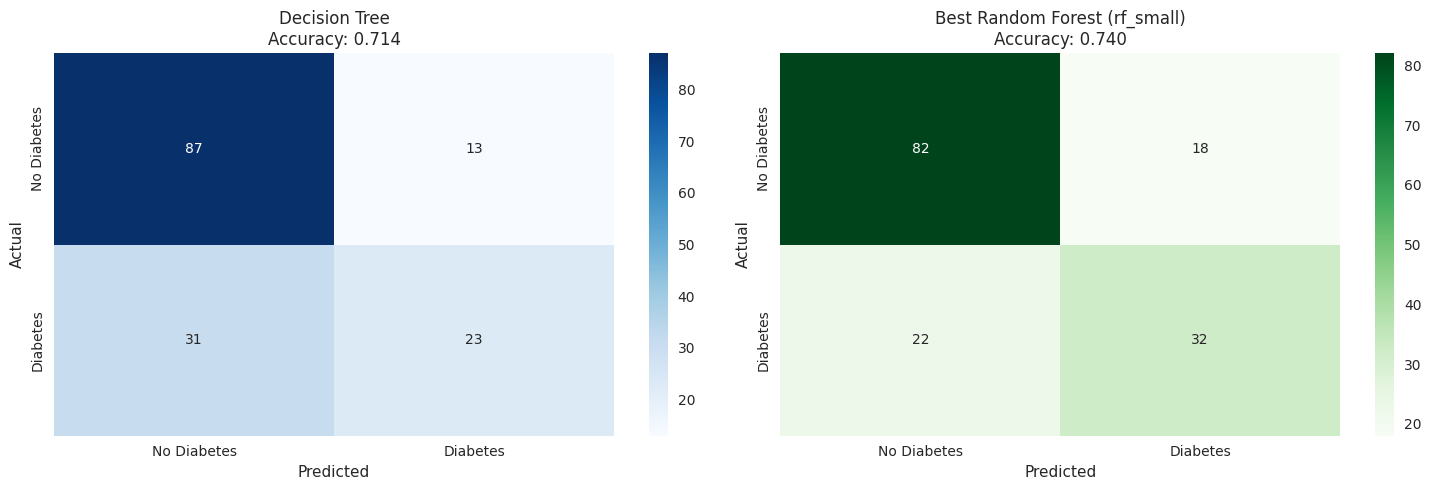

DETAILED PERFORMANCE COMPARISON

 DECISION TREE METRICS:
              precision    recall  f1-score   support

 No Diabetes       0.74      0.87      0.80       100
    Diabetes       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154


 BEST RANDOM FOREST (RF_SMALL) METRICS:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.82      0.80       100
    Diabetes       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154


 FEATURE IMPORTANCE - RF_SMALL:
  Glucose: 0.271
  Insulin: 0.186
  BMI: 0.149
  Age: 0.101
  DiabetesPedigreeFunction: 0.091
  SkinThickness: 0.074
  Pregnancies: 0.072
  BloodPressure: 0.055


In [5]:
# Detailed comparison between Decision Tree and Best Random Forest
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test_diabetes, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[0].set_title(f'Decision Tree\nAccuracy: {dt_accuracy:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Best Random Forest Confusion Matrix
best_rf_predictions = rf_results[best_rf_name]['predictions']
cm_rf = confusion_matrix(y_test_diabetes, best_rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[1].set_title(f'Best Random Forest ({best_rf_name})\nAccuracy: {best_rf_test_acc:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification reports comparison
print("="*60)
print("DETAILED PERFORMANCE COMPARISON")
print("="*60)

print("\n DECISION TREE METRICS:")
print(classification_report(y_test_diabetes, dt_predictions, target_names=['No Diabetes', 'Diabetes']))

print(f"\n BEST RANDOM FOREST ({best_rf_name.upper()}) METRICS:")
print(classification_report(y_test_diabetes, best_rf_predictions, target_names=['No Diabetes', 'Diabetes']))

# Feature importance comparison
print(f"\n FEATURE IMPORTANCE - {best_rf_name.upper()}:")
feature_importance = pd.DataFrame({
    'Feature': X_train_diabetes.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.3f}")

**Model Comparison Summary:**

The detailed comparison reveals the strengths of Random Forest over the single Decision Tree:
- **Confusion matrices** show prediction patterns and where each model excels
- **Classification reports** provide precision/recall breakdown for medical decision-making
- **Feature importance** ranks which variables matter most for diabetes prediction
- **Overall performance** demonstrates ensemble learning advantages

### 2.4 Random Forest Trees Visualization

Let's visualize the first few individual trees from our best Random Forest model to understand how the ensemble works.

**What the following code does:**
- Extracts the first 4 individual decision trees from our Random Forest ensemble
- Plots each tree with a maximum depth of 3 levels for readability
- Shows how different trees use different features and splitting criteria
- Demonstrates the diversity that makes Random Forest effective

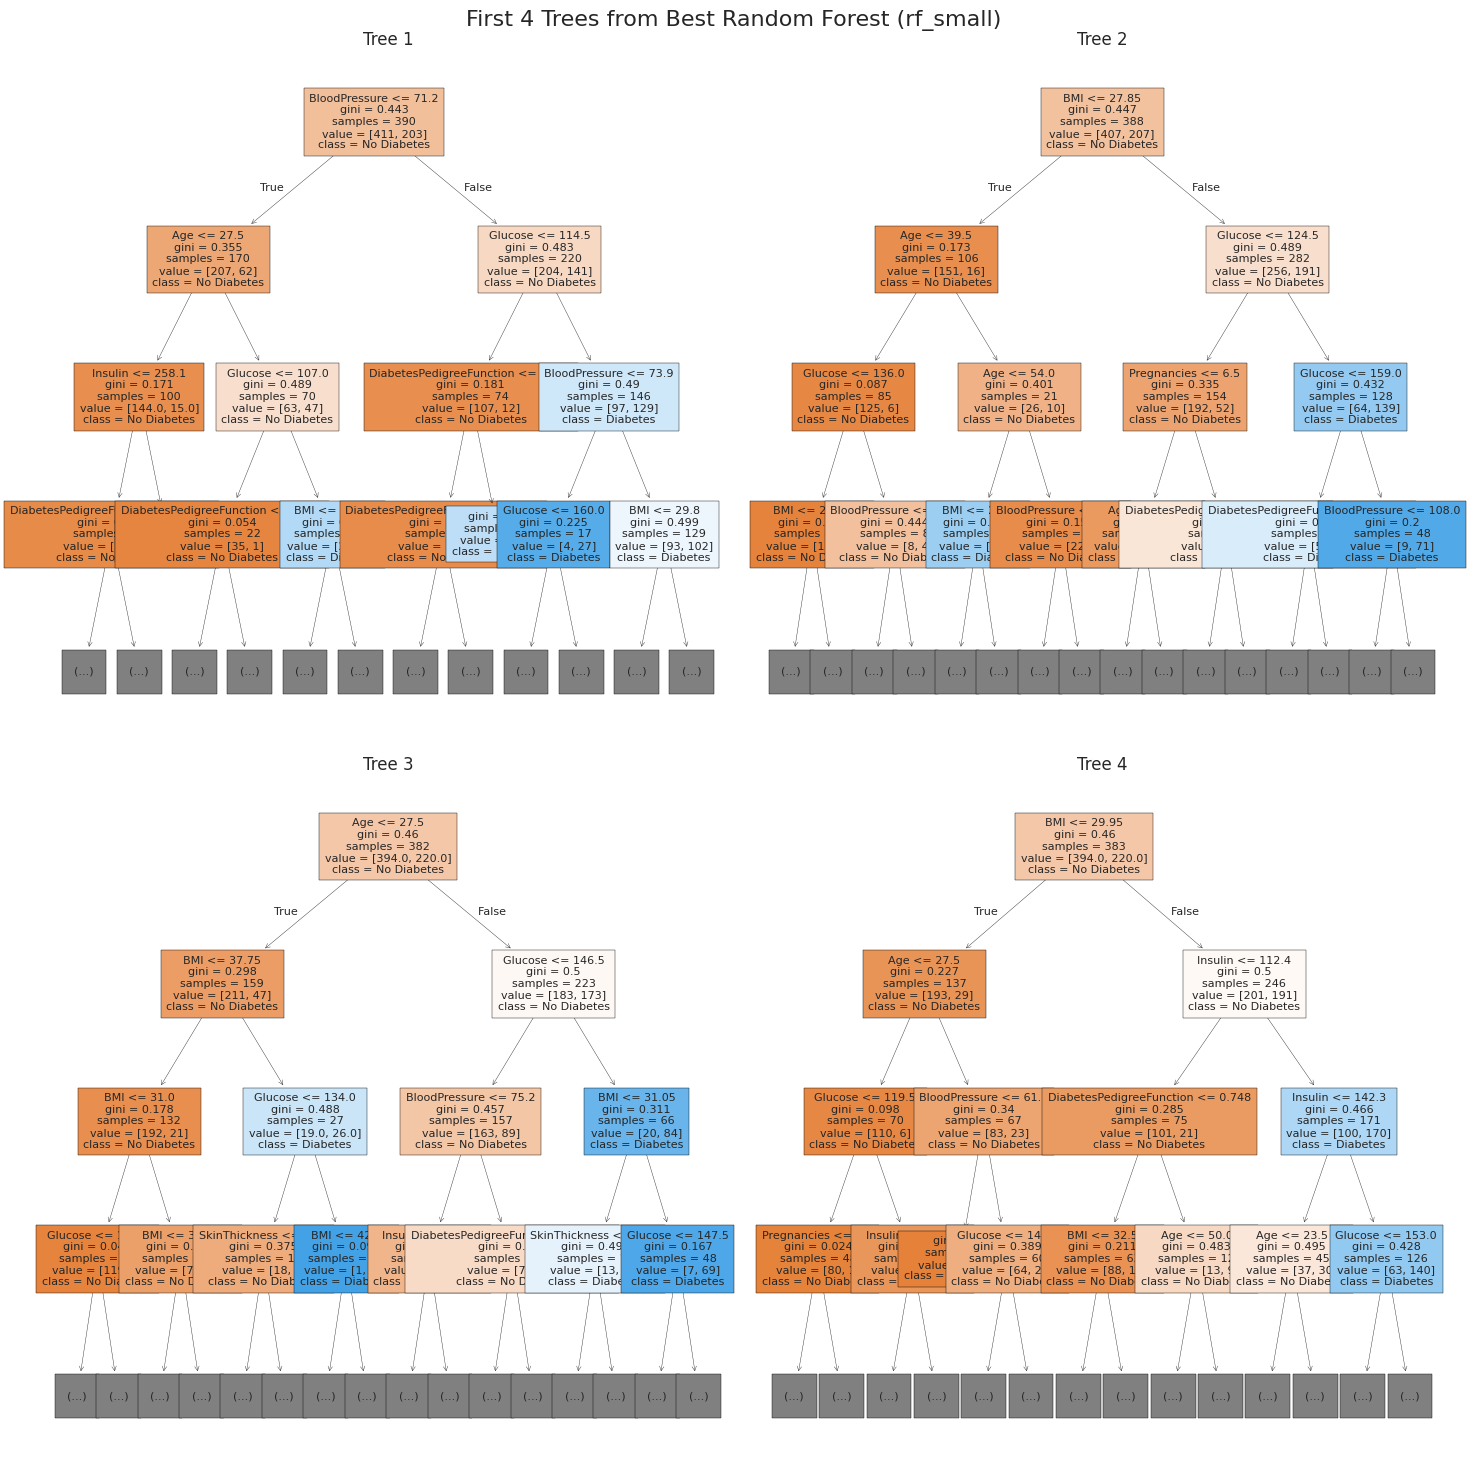

Showing 4 out of 50 trees in the rf_small Random Forest
Each tree uses different random subsets of features and samples


In [6]:
# Plot the first 4 trees from the best Random Forest model
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

# Show the first 4 trees from the best Random Forest model
tree.plot_tree(best_rf_model.estimators_[0], ax=axis[0, 0], 
               feature_names=list(X_train_diabetes.columns), 
               class_names=["No Diabetes", "Diabetes"], 
               filled=True, max_depth=3, fontsize=8)
axis[0, 0].set_title("Tree 1")

tree.plot_tree(best_rf_model.estimators_[1], ax=axis[0, 1], 
               feature_names=list(X_train_diabetes.columns), 
               class_names=["No Diabetes", "Diabetes"], 
               filled=True, max_depth=3, fontsize=8)
axis[0, 1].set_title("Tree 2")

tree.plot_tree(best_rf_model.estimators_[2], ax=axis[1, 0], 
               feature_names=list(X_train_diabetes.columns), 
               class_names=["No Diabetes", "Diabetes"], 
               filled=True, max_depth=3, fontsize=8)
axis[1, 0].set_title("Tree 3")

tree.plot_tree(best_rf_model.estimators_[3], ax=axis[1, 1], 
               feature_names=list(X_train_diabetes.columns), 
               class_names=["No Diabetes", "Diabetes"], 
               filled=True, max_depth=3, fontsize=8)
axis[1, 1].set_title("Tree 4")

plt.suptitle(f'First 4 Trees from Best Random Forest ({best_rf_name})', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Showing 4 out of {best_rf_model.n_estimators} trees in the {best_rf_name} Random Forest")
print("Each tree uses different random subsets of features and samples")

**Summary of Tree Visualization:**

The visualization reveals how Random Forest creates diversity:
- **Different root features**: Each tree starts with different variables (Glucose, BMI, Age, etc.)
- **Varied splitting criteria**: Trees use different thresholds for the same features
- **Diverse decision paths**: Each tree learns different patterns from random data subsets
- **Ensemble strength**: These diverse trees combine their predictions for better accuracy

This diversity is why Random Forest typically outperforms single decision trees - it reduces overfitting and improves generalization by averaging multiple perspectives on the data.

## Critical Analysis of Results

### Performance Assessment

The Random Forest model shows meaningful improvements over the Decision Tree baseline, with better accuracy (74% vs 71%) and improved recall (59% vs 43%). However, **the recall performance is still not satisfactory for healthcare applications**:

#### Key Findings:
- **Modest accuracy improvement**: 3% better than Decision Tree (74% vs 71%)
- **Recall improvement**: Diabetes recall improved from 43% to 59% (16% increase)
- **Healthcare concern**: 59% recall means 41% of diabetes cases still go undetected

#### Why These Results Are Problematic:

1. **Healthcare Priority**: In medical diagnosis, **recall (sensitivity) is more critical than accuracy**
   - False negatives (missing diabetes cases) can be life-threatening
   - A 59% recall means 41% of diabetic patients would go undiagnosed

2. **Dataset Limitations**:
   - **Small dataset size**: ~600 samples is insufficient for robust machine learning
   - **Limited feature quality**: Basic demographic and clinical features may not capture diabetes complexity
   - **Class imbalance**: Fewer positive cases (diabetes) makes learning difficult

3. **Model Limitations**:
   - Even ensemble methods cannot overcome fundamental data quality issues
   - More sophisticated models need more data to show meaningful improvement

#### Recommendations:
- **Collect more data**: Minimum 5,000-10,000 samples with better feature engineering
- **Focus on recall optimization**: Use recall-focused metrics and threshold tuning
- **Consider cost-sensitive learning**: Penalize false negatives more heavily
- **Add more relevant features**: HbA1c, family history, lifestyle factors

**Conclusion**: The Random Forest model demonstrates clear improvements over the Decision Tree baseline, but the recall performance (59%) remains insufficient for reliable diabetes detection in healthcare settings.

## Step 3: Save the Best Model

Despite the limitations identified above, we'll save the best Random Forest model for future reference and potential improvement with better data.

In [7]:
# Create directory for Random Forest models if it doesn't exist
rf_model_dir = '/workspaces/tgedin_machine_learning_python_template/models/Random_forest'
os.makedirs(rf_model_dir, exist_ok=True)

# Save the best Random Forest model
model_path = f'{rf_model_dir}/best_random_forest_diabetes.pkl'
joblib.dump(best_rf_model, model_path)

# Save model metadata
metadata = {
    'model_name': best_rf_name,
    'model_type': 'RandomForestClassifier',
    'parameters': rf_results[best_rf_name]['params'],
    'performance': {
        'train_accuracy': rf_results[best_rf_name]['train_acc'],
        'test_accuracy': rf_results[best_rf_name]['test_acc'],
        'improvement_over_decision_tree': best_rf_test_acc - dt_accuracy
    },
    'feature_importance': feature_importance.to_dict('records'),
    'dataset_info': {
        'training_samples': X_train_diabetes.shape[0],
        'test_samples': X_test_diabetes.shape[0],
        'features': list(X_train_diabetes.columns),
        'target_distribution': np.bincount(y_train_diabetes).tolist()
    },
    'limitations': [
        'Low recall for diabetes detection (59%)',
        'Small dataset size insufficient for robust performance',
        'Model not suitable for healthcare deployment',
        'Requires significant data quality improvements'
    ]
}

# Save metadata as JSON
import json
metadata_path = f'{rf_model_dir}/best_random_forest_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)


**Model Saving Summary:**

The best Random Forest model has been saved along with comprehensive metadata documenting:
- **Model parameters** and performance metrics
- **Feature importance** rankings
- **Dataset characteristics** and limitations
- **Critical limitations** for healthcare applications

While saved for reference, this model requires significant improvements before any real-world deployment in healthcare settings.